The Raw RBFNN is presented here with cluster sizes ranging from 50 to 1000.

50 Clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

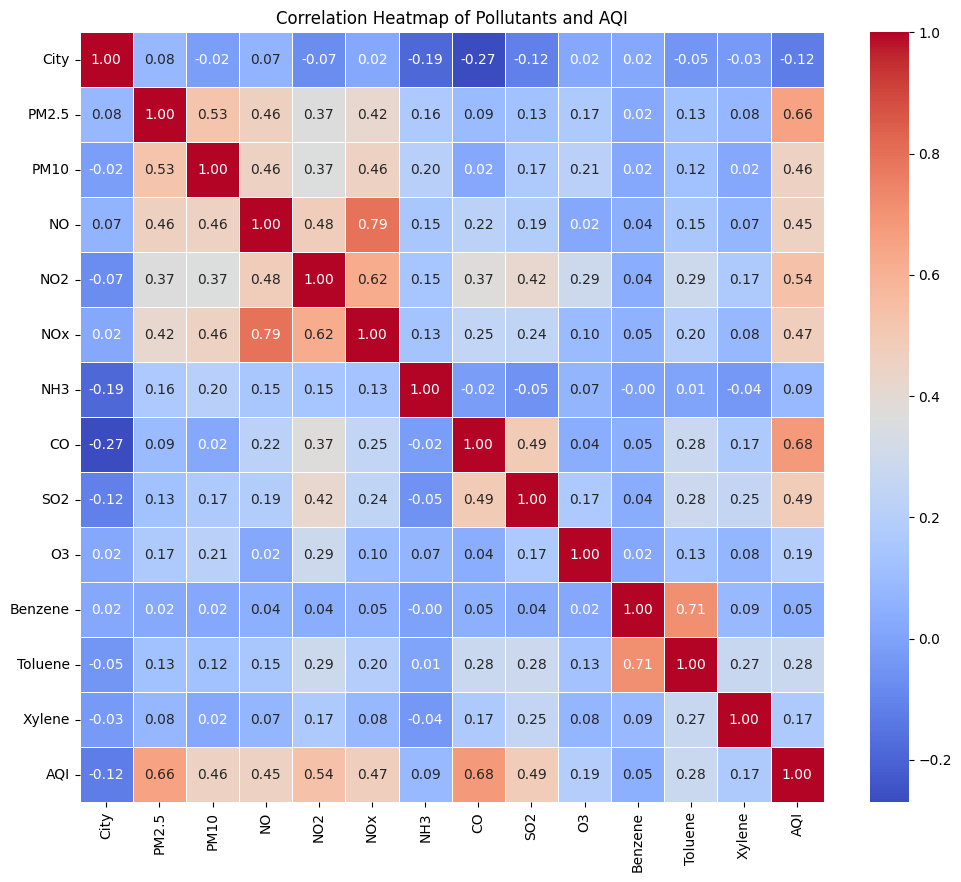


Training Performance :
MSE: 0.15419513789324366
RMSE: 0.3926768873937498
R² Score: 0.8478859306162202

Testing Performance :
MSE: 0.14670346747146207
RMSE: 0.383018886572793
R² Score: 0.848445317108878


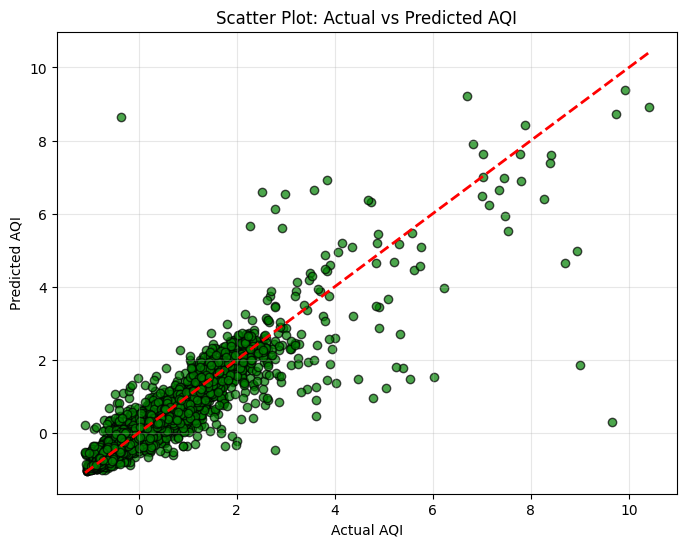

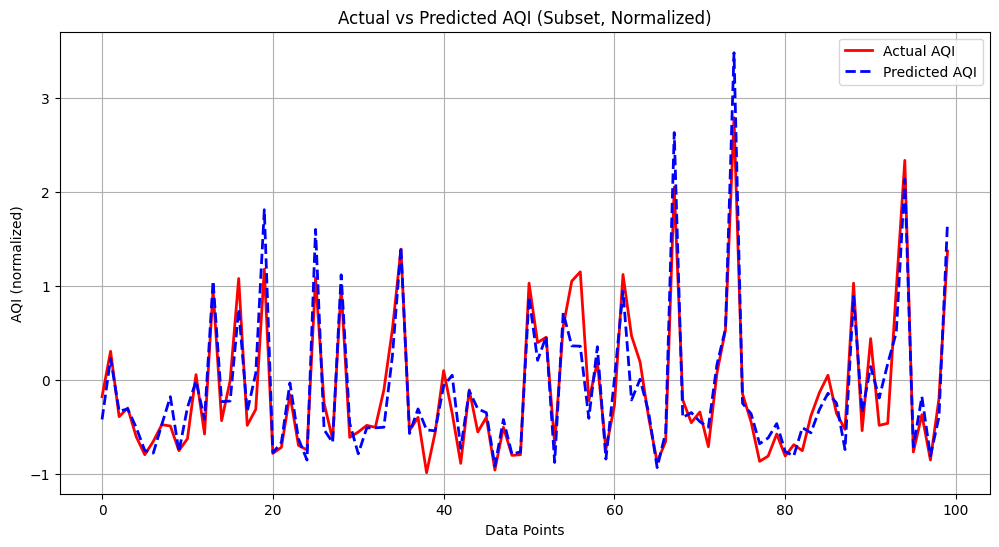

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


100 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

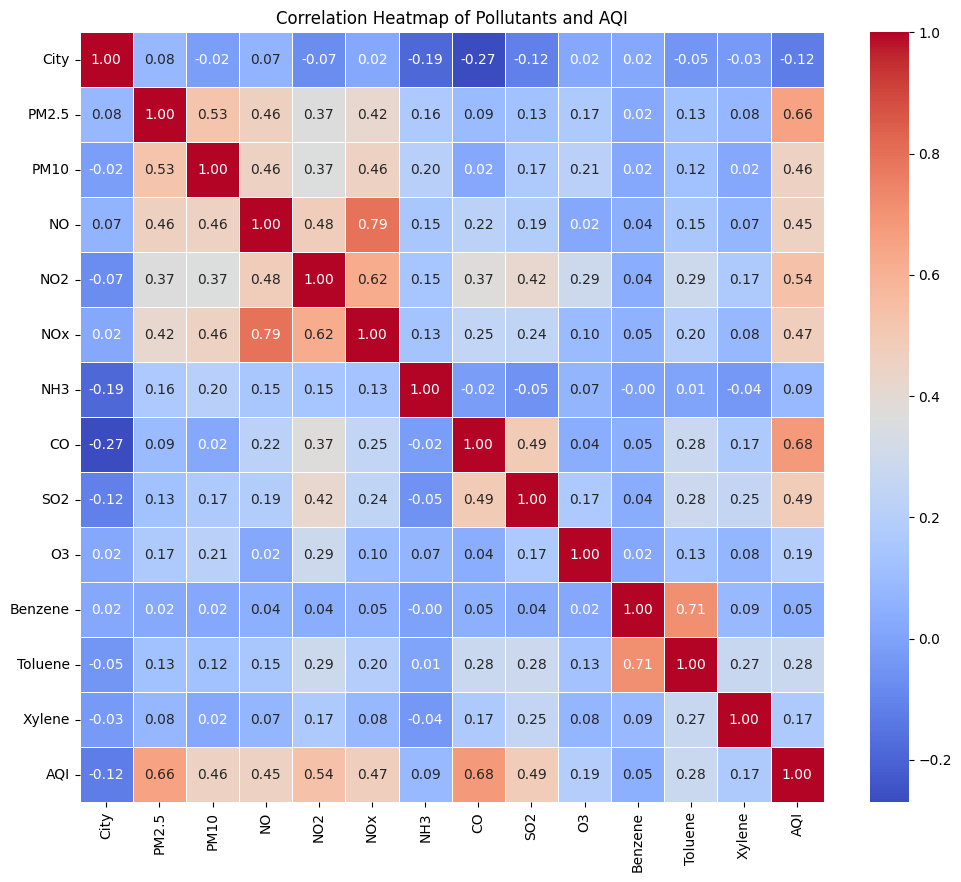


Training Performance :
MSE: 0.10934205307810842
RMSE: 0.33066909906749437
R² Score: 0.8921336633843556

Testing Performance :
MSE: 0.13439421954905978
RMSE: 0.36659817177539195
R² Score: 0.8611616093524188


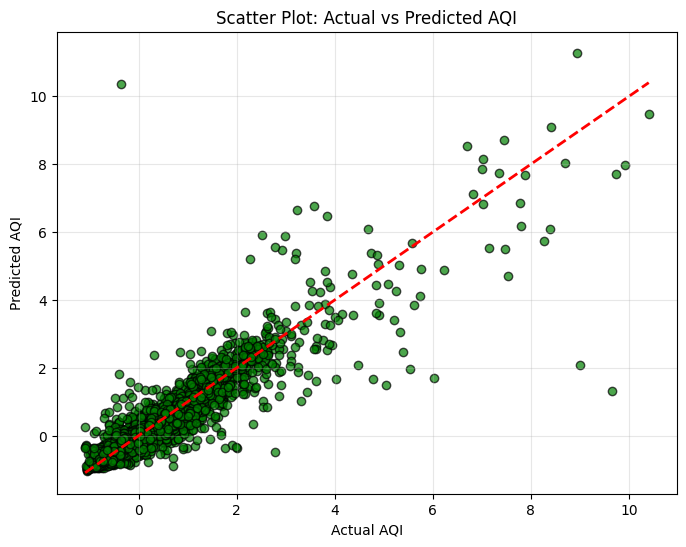

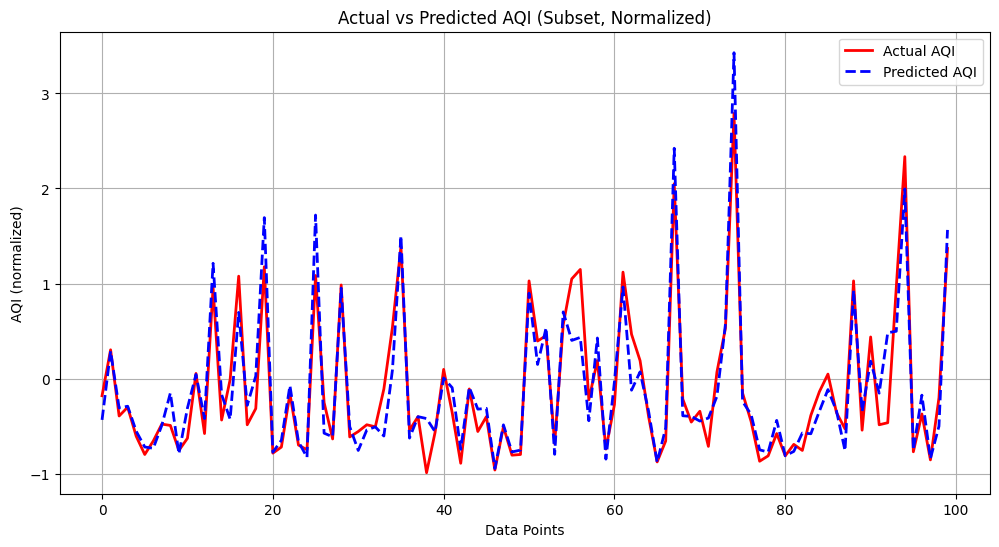

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


200 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

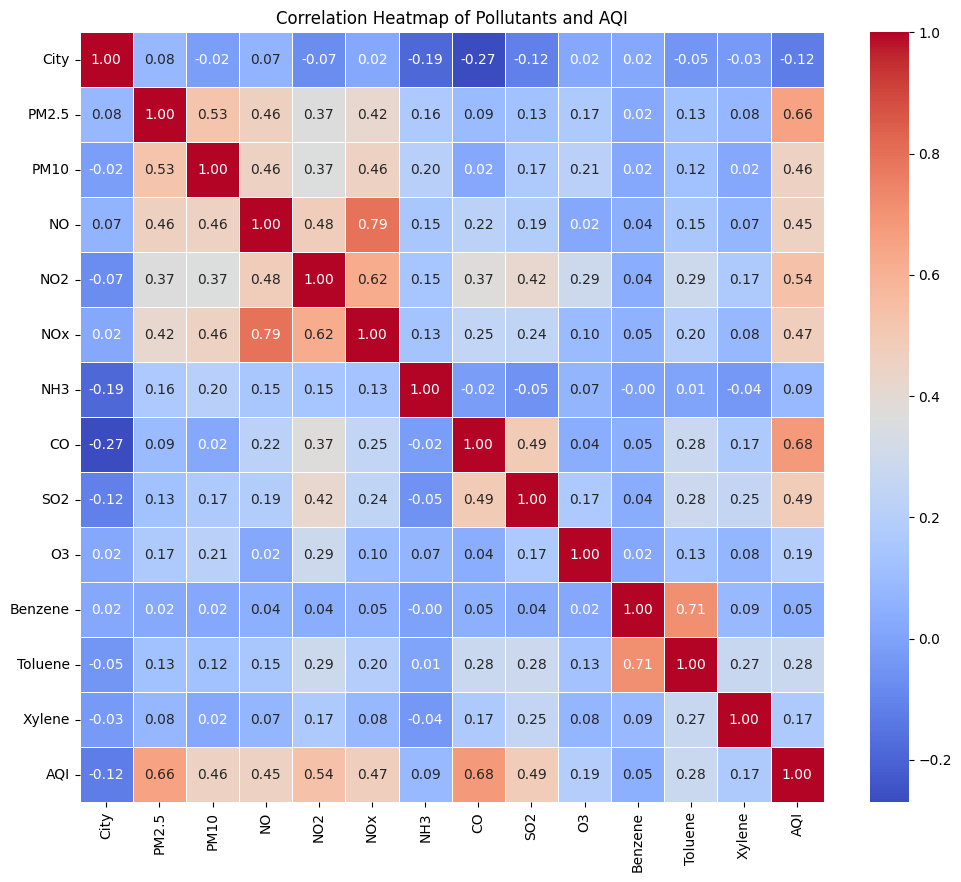


Training Performance :
MSE: 0.10151138366305816
RMSE: 0.31860851159857323
R² Score: 0.8998586474986219

Testing Performance :
MSE: 0.13109877399169678
RMSE: 0.3620756467807477
R² Score: 0.8645660292685892


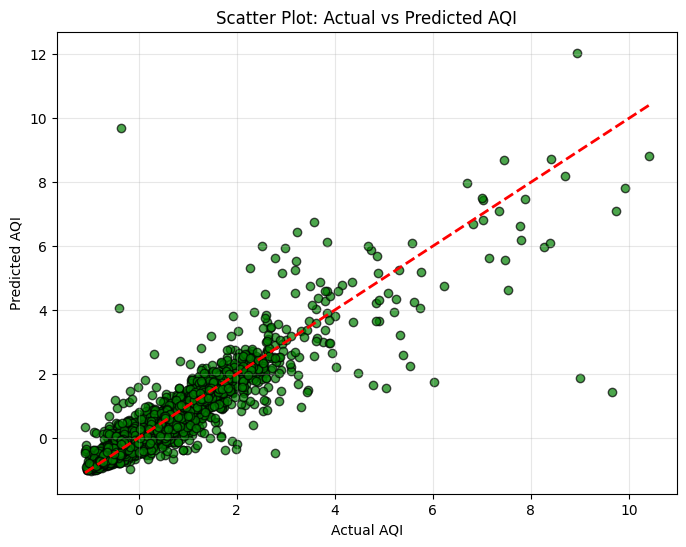

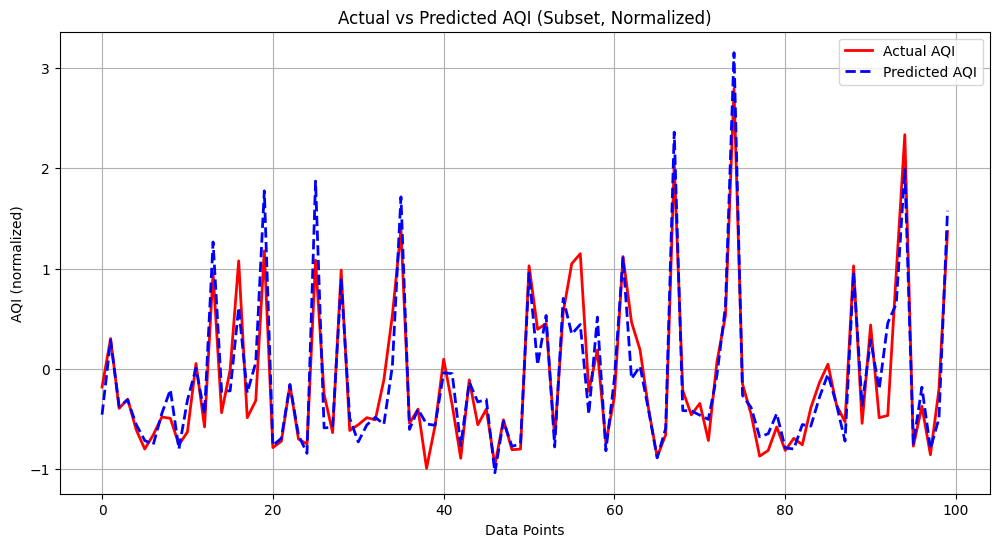

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 200
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


500 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

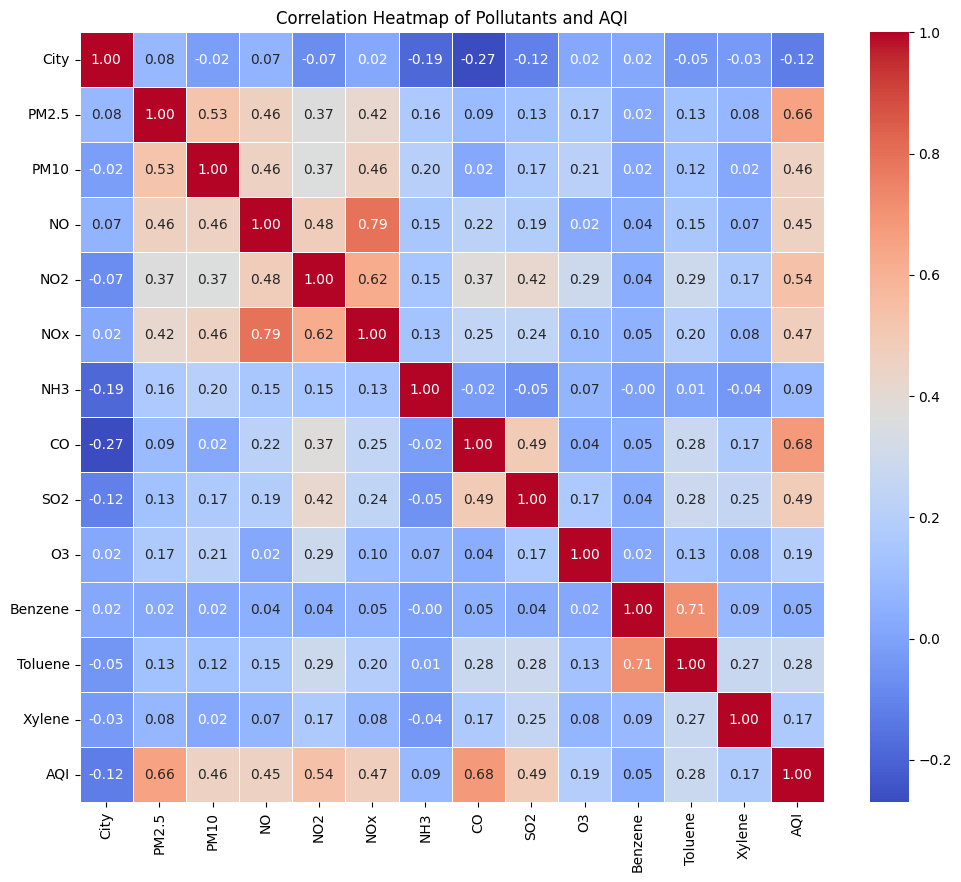


Training Performance :
MSE: 0.0798268922238558
RMSE: 0.2825365325473076
R² Score: 0.9212504778792823

Testing Performance :
MSE: 0.12002924184129612
RMSE: 0.34645236590517914
R² Score: 0.8760016106063881


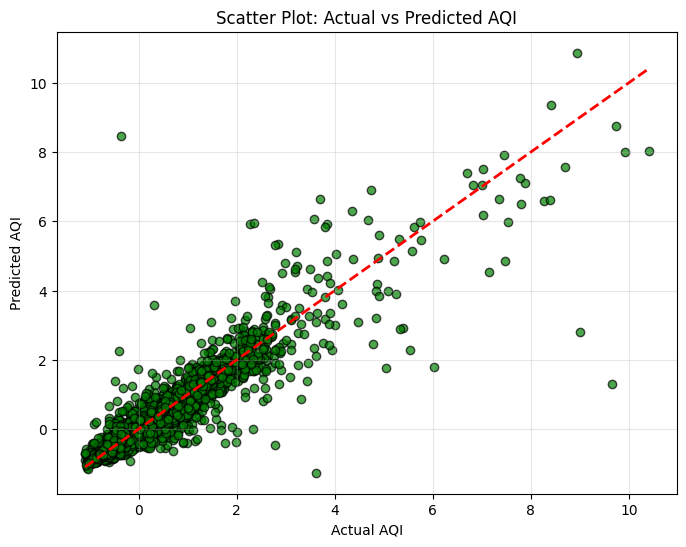

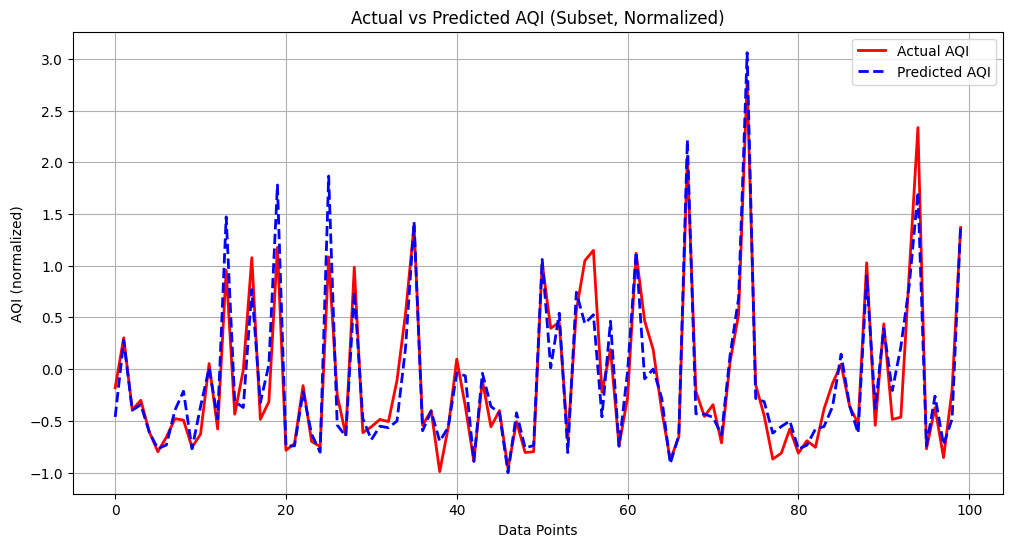

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 500
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


550 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

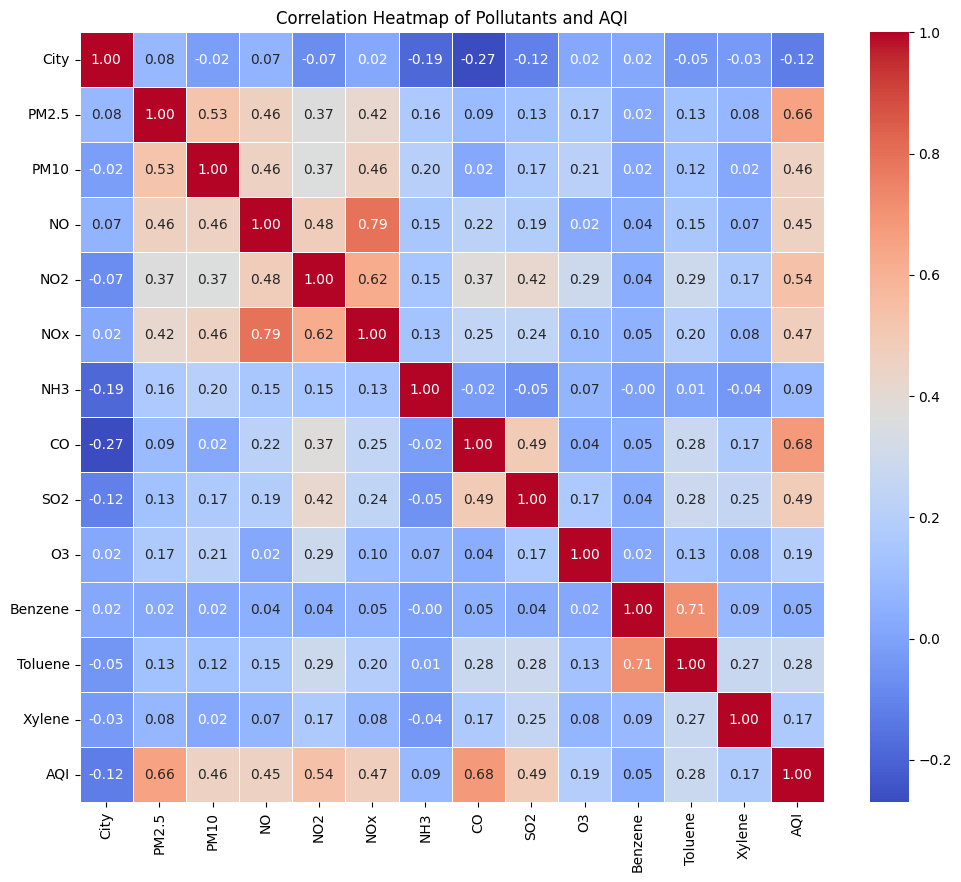


Training Performance :
MSE: 0.07634990124933079
RMSE: 0.2763148589007308
R² Score: 0.9246805422352145

Testing Performance :
MSE: 0.12184948315315082
RMSE: 0.34906945319398947
R² Score: 0.8741211772426906


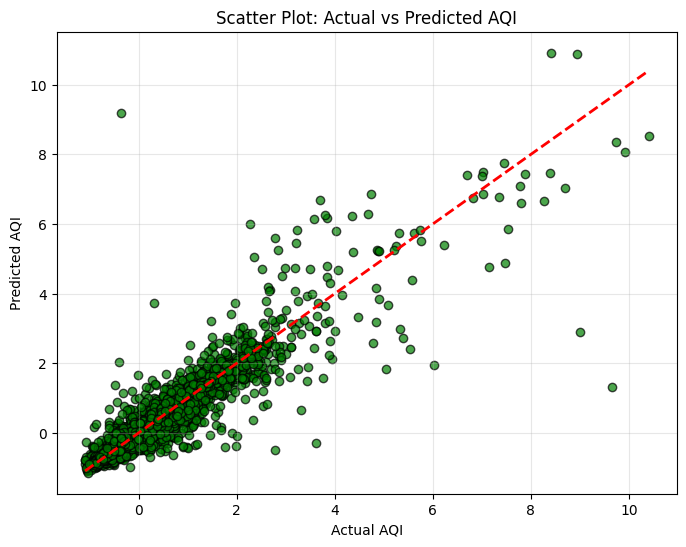

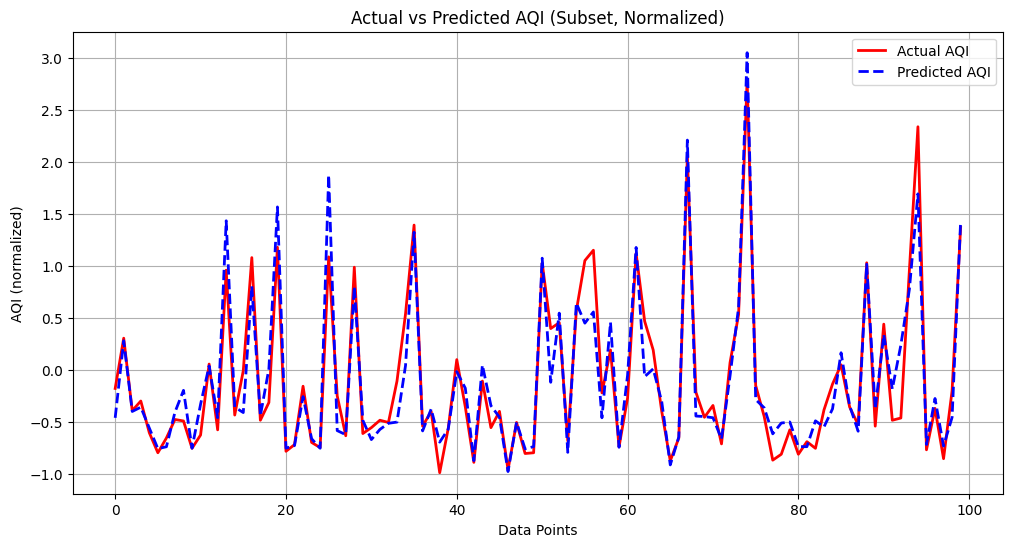

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 550
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


600 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

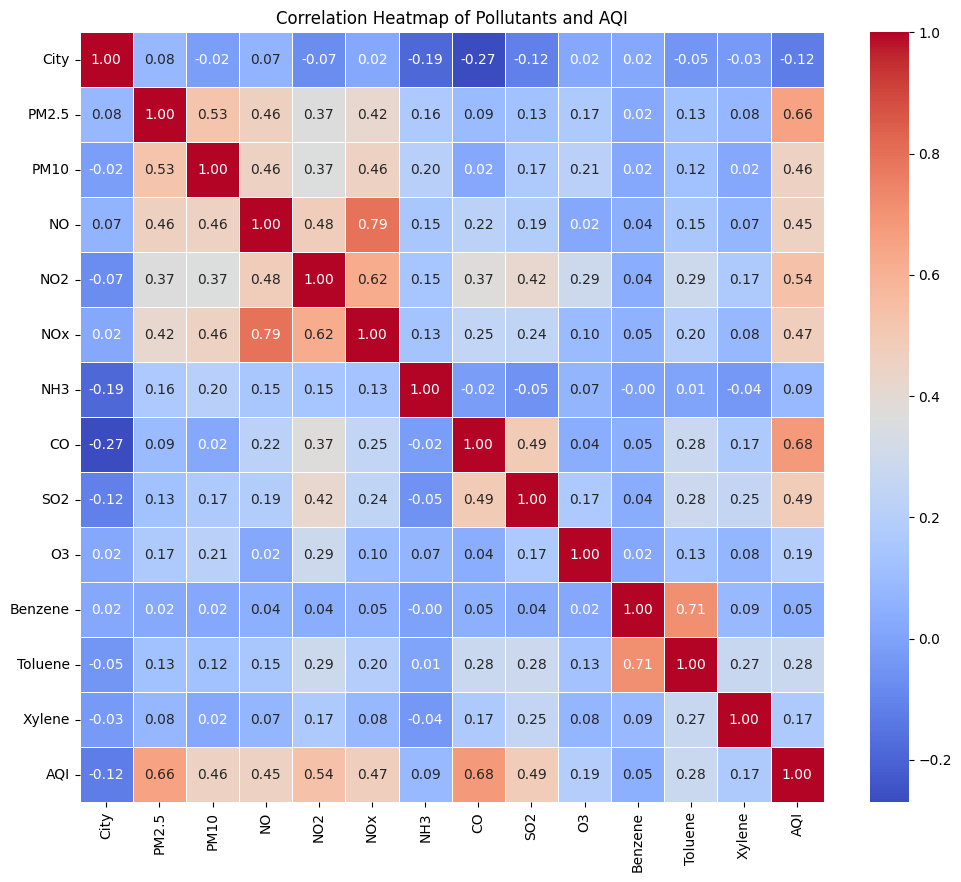


Training Performance :
MSE: 0.07597994759455393
RMSE: 0.2756446037827585
R² Score: 0.925045502873276

Testing Performance :
MSE: 0.12437143179672999
RMSE: 0.35266334059089555
R² Score: 0.8715158323688914


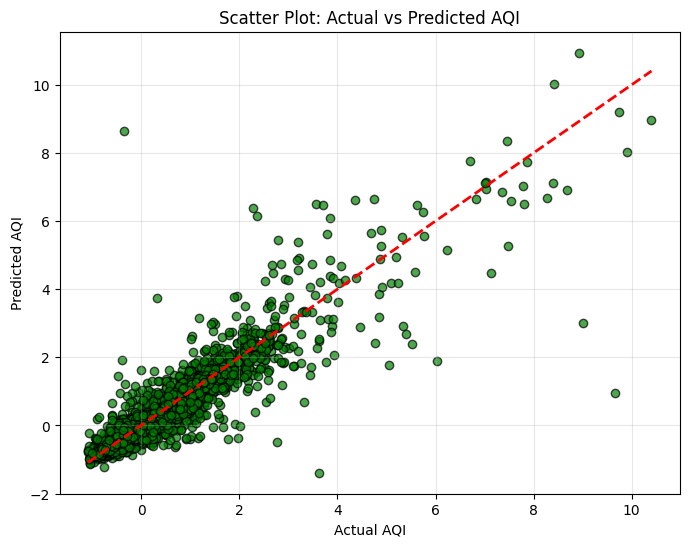

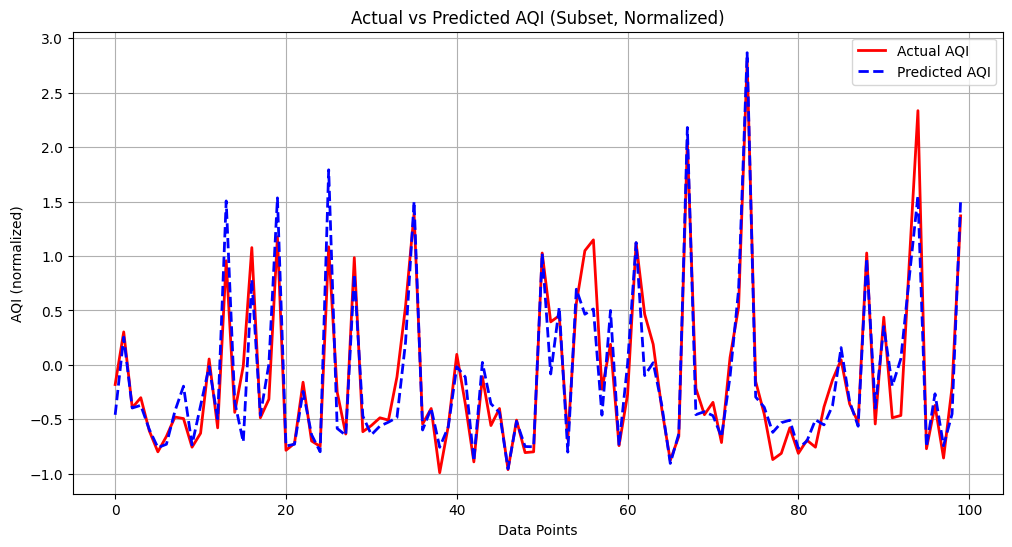

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 600
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()


1000 clusters

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total

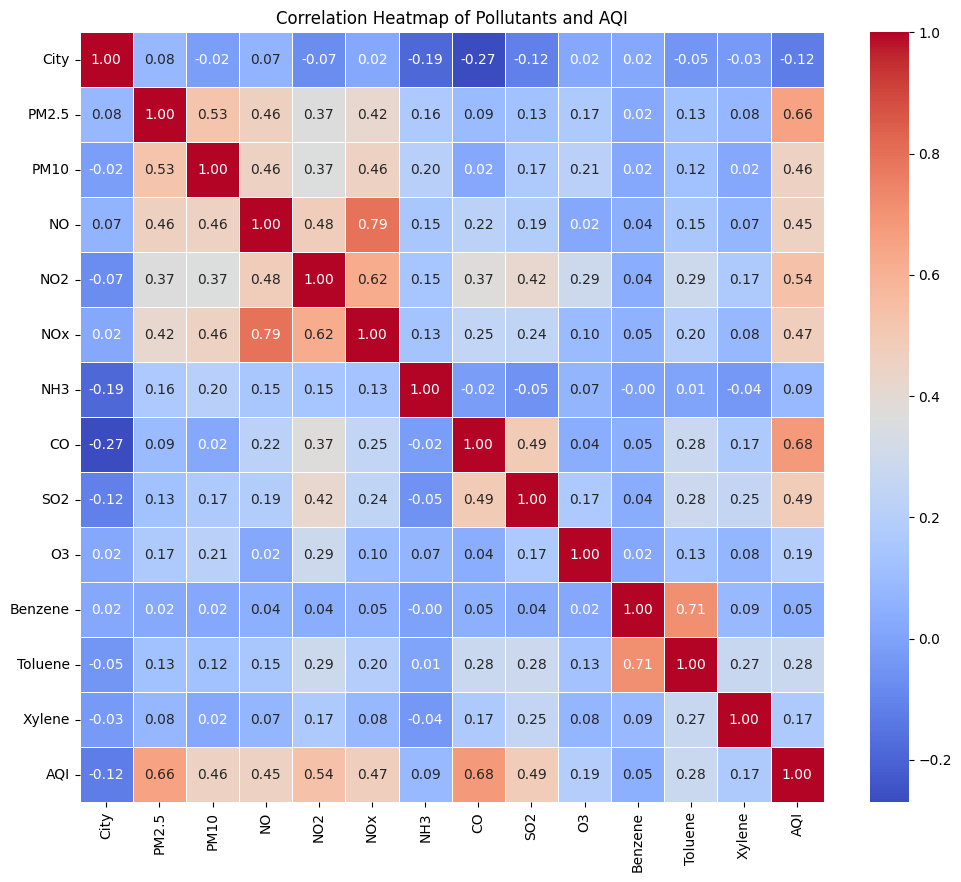


Training Performance :
MSE: 0.06488448285342845
RMSE: 0.25472432717239324
R² Score: 0.9359912195575815

Testing Performance :
MSE: 0.12943269886221295
RMSE: 0.3597675622707152
R² Score: 0.8662871984561602


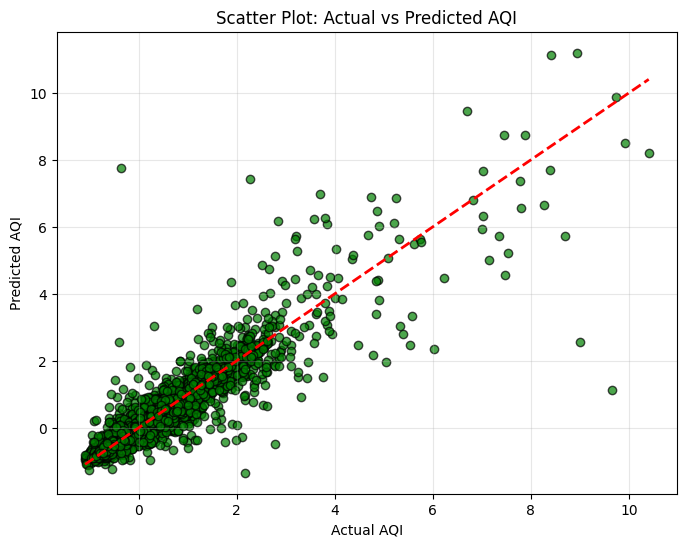

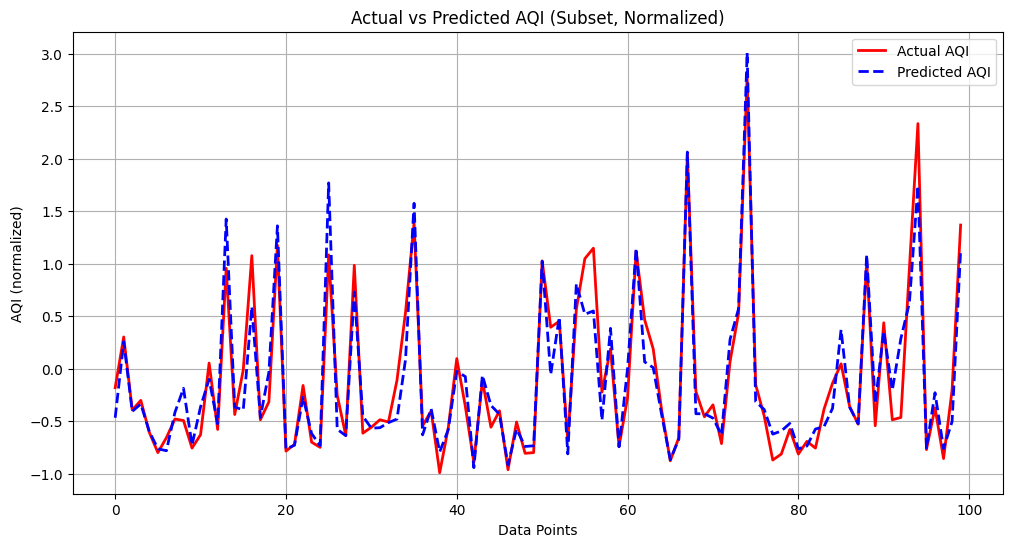

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
from scipy.spatial.distance import cdist

df = pd.read_csv("city_day.csv")
print(df.info())
data_info = {
    "shape": df.shape,
    "columns": df.columns.tolist(),
    "head": df.head(),
    "info": df.info(),
    "missing_values": df.isnull().sum()
}
print(data_info)

df = df.dropna(subset=["AQI"])
df = df.drop(columns=["Date", "AQI_Bucket"], axis=1)
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())
label_encoder = LabelEncoder()
df['City'] = label_encoder.fit_transform(df['City'])

plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Pollutants and AQI")
plt.show()

features = ["PM2.5", "PM10", "NO", "NO2", "NOx", "NH3", "CO", "SO2", "O3", "Benzene", "Toluene", "Xylene"]
X = df[features].values
y = df["AQI"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = y.reshape(-1, 1)
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

num_clusters = 1000
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(X_train)
centers = kmeans.cluster_centers_

pairwise_distances = cdist(centers, centers, 'euclidean')
sigma = np.median(pairwise_distances) / np.sqrt(2)

distances_train = cdist(X_train, centers, 'euclidean')
R_train = np.exp(- (distances_train ** 2) / (2 * sigma ** 2))
W = np.dot(np.linalg.pinv(R_train), y_train)

distances_test = cdist(X_test, centers, 'euclidean')
R_test = np.exp(- (distances_test ** 2) / (2 * sigma ** 2))

y_pred_train = np.dot(R_train, W)
y_pred_test = np.dot(R_test, W)

mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTraining Performance :")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R² Score:", r2_train)

print("\nTesting Performance :")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R² Score:", r2_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Scatter Plot: Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(alpha=0.3)
plt.show()

subset_size = 100
indices = np.arange(subset_size)
y_test_subset = y_test[:subset_size]
y_pred_subset = y_pred_test[:subset_size]

plt.figure(figsize=(12, 6))
plt.plot(indices, y_test_subset, label='Actual AQI', color='red', linewidth=2)
plt.plot(indices, y_pred_subset, label='Predicted AQI', color='blue', linestyle='dashed', linewidth=2)
plt.title("Actual vs Predicted AQI (Subset, Normalized)")
plt.xlabel("Data Points")
plt.ylabel("AQI (normalized)")
plt.legend()
plt.grid(True)
plt.show()
